# Models trained on Colon Data
### Seungkyoon Bong

Below we present models trained on Colon data from Alon et al which are used for the model repair algorithm.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive, files
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/College/2021Spring/Thesis/Experiments/Colon
%ls

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/College/2021Spring/Thesis/Experiments/Colon
colon_62_1000_2000_W1_0.csv          colon_retrain_62_1000_2000_W2_0.csv
colon_62_1000_2000_W1.csv            colon_retrain_62_1000_2000_W2.csv
colon_62_1000_2000_W2_0.csv          colon_retrain_62_1000_2000_X.csv
colon_62_1000_2000_W2.csv            colon_retrain_62_100_200_W1_0.csv
colon_62_1000_2000_X.csv             colon_retrain_62_100_200_W1.csv
colon_62_100_200_W1_0.csv            colon_retrain_62_100_200_W2_0.csv
colon_62_100_200_W1.csv              colon_retrain_62_100_200_W2.csv
colon_62_100_200_W2_0.csv            colon_retrain_62_100_200_X.csv
colon_62_100_200_W2.csv              colon_retrain_62_150_300_W1_0.csv
colon_62_100_200_X.csv               colon_retrain_62_150_300_W1.csv
colon_62_150_300_W1_0.csv            colon_retrain_62_150_300_W2_0.csv
colon_62_150_300_W1.csv      

In [2]:
# Function to train the colon model in a layerwise fashion

def train_model(Y, X, d, p, seed1=1, seed2=2, step_size=1e-6, steps=100000, retrain=False):
    print("Seeding random initial parameters; seeds = (%d,%d)" % (seed1, seed2))
    print("Running gradient descent with step size %.2e" % step_size)

    n = X.shape[0]
    np.random.seed(seed1)
    H1 = p
    W1 = np.random.randn(d,H1)
    np.random.seed(seed2)
    W2 = np.random.randn(H1,1)
    num_examples = n

    loss = []
    for t in np.arange(1,steps):
    
        hidden_layer = np.tanh(np.dot(X, W1))
        Yhat = np.dot(hidden_layer, W2)
        current_loss = .5*np.mean((Y-Yhat)**2)
        loss.append(current_loss)

        if t % (steps/10) == 0:
            print("iteration %d: loss %f" % (t, current_loss))
          
        dloss = Yhat - Y
        dloss /= num_examples

        # backpropate the gradient to the parameters
        # first backprop to parameters W2 and b2
        dW2 = np.dot(hidden_layer.T, dloss)
        # db2 = np.sum(dloss)
    
        # next backprop to hidden layer
        dhidden = np.dot(dloss, W2.T)
        # backprop the tanh activation
        dhidden = 1/np.cosh(dhidden)**2
    
        # finally backprop to W1
        dW1 = np.dot(X.T, dhidden)
    
        # perform a parameter update
        W1 += -step_size * dW1
        W2 += -step_size * dW2
    
    # Plot the loss as a function of gradient step
    plt.plot(np.arange(len(loss)), loss)

    if not(retrain):
        plt.show()
        return (W1, W2)
    
    # Now fix W1, and retrain W2
    #print("\nNow fixing trained W1 and retraining W2, seed=%d" % seed2)
    print("\nNow fixing trained W1 and retraining W2, initialized at zero")

    loss = []

    np.random.seed(seed2)
    W2 = 0*np.random.randn(H1,1)
    for t in np.arange(1,steps):
    
        hidden_layer = np.tanh(np.dot(X, W1))
        Yhat = np.dot(hidden_layer, W2)
        current_loss = .5*np.mean((Y-Yhat)**2)
        loss.append(current_loss)

        if t % (steps/10) == 0:
            print("iteration %d: loss %f" % (t, current_loss))
      
        dloss = Yhat - Y
        dloss /= num_examples

        # backpropate the gradient to the parameters
        # backprop to parameters W2
        dW2 = np.dot(hidden_layer.T, dloss)
        W2 += -step_size * dW2
    
    # Plot the loss as a function of gradient step
    plt.plot(np.arange(len(loss)), loss)
    plt.show()

    return (W1, W2)

In [3]:
import pandas as pd

def write_model(filename, seed1, seed2, X, W1, W2):
    d = X.shape[1]
    H1 = W1.shape[1]
    print("Writing model to prefix %s with seeds (%d,%d)" % (filename, seed1, seed2))
    np.random.seed(seed1)
    W1_0 = np.random.randn(d,H1)
    np.random.seed(seed2)
    W2_0 = np.random.randn(H1,1)

    data = pd.DataFrame(data=X)
    data.to_csv("%s_X.csv" % filename, index=False)
    
    data = pd.DataFrame(data=W1_0)
    data.to_csv("%s_W1_0.csv" % filename, index=False)
    data = pd.DataFrame(data=W2_0)
    data.to_csv("%s_W2_0.csv" % filename, index=False)
    
    data = pd.DataFrame(data=W1)
    data.to_csv("%s_W1.csv" % filename, index=False)
    data = pd.DataFrame(data=W2)
    data.to_csv("%s_W2.csv" % filename, index=False)
    



In [ ]:
# Initial experimentation with smaller models

n, d, p = (62, 400, 800)
Y = pd.read_csv("colon_y.csv").to_numpy()
X = pd.read_csv("colon_x.csv").to_numpy()
print(Y.shape)
print(X.shape)
np.random.seed(1)
X = X[:, np.random.choice(2000, size = d, replace = False)]
print(X.shape)
(W1, W2) = train_model(Y, X, d, p, steps=30000, step_size=1e-6, retrain=False)

(62, 1)
(62, 2000)
(62, 400)



-------------------------------------------
1.0
1.0047423539511113
(62, 100)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 5.00e-06
iteration 2000: loss 84.338164
iteration 4000: loss 68.419982
iteration 6000: loss 62.582799
iteration 8000: loss 59.978362
iteration 10000: loss 56.995632
iteration 12000: loss 52.351041
iteration 14000: loss 47.970591
iteration 16000: loss 45.927702
iteration 18000: loss 44.221548

Now fixing trained W1 and retraining W2, initialized at zero
iteration 2000: loss 1.377563
iteration 4000: loss 1.330952
iteration 6000: loss 1.298614
iteration 8000: loss 1.271551
iteration 10000: loss 1.246933
iteration 12000: loss 1.223808
iteration 14000: loss 1.201804
iteration 16000: loss 1.180743
iteration 18000: loss 1.160511


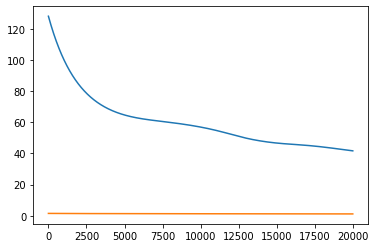

Writing model to prefix colon_retrain_62_100_200 with seeds (1,2)

-------------------------------------------
1.0
1.0039276505764518
(62, 150)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 3.00e-06
iteration 2000: loss 141.776463
iteration 4000: loss 125.984326
iteration 6000: loss 114.098111
iteration 8000: loss 104.520767
iteration 10000: loss 96.430071
iteration 12000: loss 89.359184
iteration 14000: loss 83.069557
iteration 16000: loss 77.460825
iteration 18000: loss 72.439847

Now fixing trained W1 and retraining W2, initialized at zero
iteration 2000: loss 1.382345
iteration 4000: loss 1.332330
iteration 6000: loss 1.297535
iteration 8000: loss 1.269663
iteration 10000: loss 1.245264
iteration 12000: loss 1.222863
iteration 14000: loss 1.201800
iteration 16000: loss 1.181753
iteration 18000: loss 1.162547


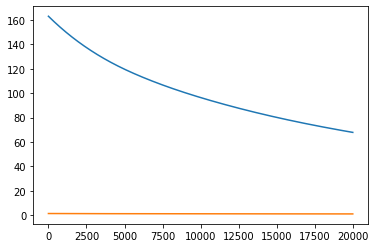

Writing model to prefix colon_retrain_62_150_300 with seeds (1,2)

-------------------------------------------
1.0
1.0060386011228442
(62, 250)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 2000: loss 307.637363
iteration 4000: loss 287.868007
iteration 6000: loss 270.788892
iteration 8000: loss 255.662212
iteration 10000: loss 241.202541
iteration 12000: loss 228.221548
iteration 14000: loss 217.284430
iteration 16000: loss 206.214632
iteration 18000: loss 194.333045

Now fixing trained W1 and retraining W2, initialized at zero
iteration 2000: loss 1.416177
iteration 4000: loss 1.378604
iteration 6000: loss 1.349663
iteration 8000: loss 1.326106
iteration 10000: loss 1.305972
iteration 12000: loss 1.288069
iteration 14000: loss 1.271671
iteration 16000: loss 1.256330
iteration 18000: loss 1.241767


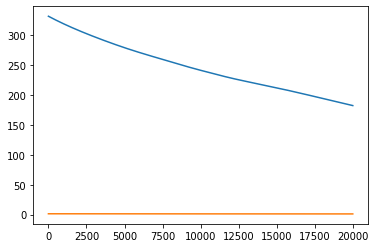

Writing model to prefix colon_retrain_62_250_500 with seeds (1,2)

-------------------------------------------
1.0
1.0050400871832559
(62, 500)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 2000: loss 323.615327
iteration 4000: loss 279.378006
iteration 6000: loss 227.367673
iteration 8000: loss 194.976218
iteration 10000: loss 177.156443
iteration 12000: loss 163.792754
iteration 14000: loss 152.980216
iteration 16000: loss 141.210557
iteration 18000: loss 128.491618

Now fixing trained W1 and retraining W2, initialized at zero
iteration 2000: loss 1.373752
iteration 4000: loss 1.317518
iteration 6000: loss 1.275781
iteration 8000: loss 1.240225
iteration 10000: loss 1.207813
iteration 12000: loss 1.177378
iteration 14000: loss 1.148423
iteration 16000: loss 1.120700
iteration 18000: loss 1.094060


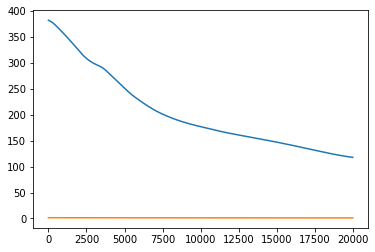

Writing model to prefix colon_retrain_62_500_1000 with seeds (1,2)

-------------------------------------------
1.0
1.005249299340254
(62, 1000)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-07
iteration 2000: loss 826.480297
iteration 4000: loss 789.078380
iteration 6000: loss 755.214968
iteration 8000: loss 724.287875
iteration 10000: loss 696.192053
iteration 12000: loss 670.689219
iteration 14000: loss 647.338564
iteration 16000: loss 625.699641
iteration 18000: loss 605.490988

Now fixing trained W1 and retraining W2, initialized at zero
iteration 2000: loss 1.444588
iteration 4000: loss 1.424139
iteration 6000: loss 1.405947
iteration 8000: loss 1.389635
iteration 10000: loss 1.374888
iteration 12000: loss 1.361448
iteration 14000: loss 1.349100
iteration 16000: loss 1.337669
iteration 18000: loss 1.327008


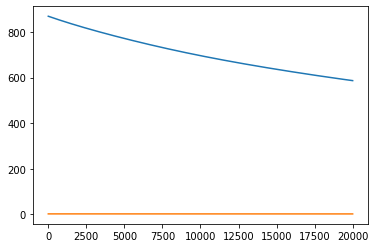

Writing model to prefix colon_retrain_62_1000_2000 with seeds (1,2)


In [9]:
# Models trained with step size 20000

n = 62
d = np.array([100, 150, 250, 500, 750])
p = np.array([j*2 for j in d])
lrs = np.array([5e-6, 3e-6, 1e-6, 1e-6, 6e-7])
Y = pd.read_csv("colon_y.csv").to_numpy()
X = pd.read_csv("colon_x.csv").to_numpy()
for i in np.arange(0, len(p)): 
    print("\n-------------------------------------------")
    np.random.seed(1)
    X_ = X[:, np.random.choice(1999, size = d[i], replace = False)]
    X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
    print(np.std(X_))
    X_ = np.random.normal(X_, scale = 0.001)
    print(np.std(X_))
    print(X_.shape)
    print(Y.shape)
    (W1, W2) = train_model(Y, X_, d[i], p[i], steps=20000, step_size=lrs[i], retrain=True)
    write_model('colon_retrain_%d_%d_%d' % (n, d[i], p[i]), 1, 2, X_, W1, W2)
    


-------------------------------------------
1.0
1.0047423539511113
(62, 100)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 5.00e-06
iteration 10000: loss 56.995632
iteration 20000: loss 41.707643
iteration 30000: loss 33.455098
iteration 40000: loss 28.040050
iteration 50000: loss 22.529664
iteration 60000: loss 19.206541
iteration 70000: loss 16.813164
iteration 80000: loss 14.762387
iteration 90000: loss 13.051085

Now fixing trained W1 and retraining W2, initialized at zero
iteration 10000: loss 1.198770
iteration 20000: loss 1.075255
iteration 30000: loss 0.976496
iteration 40000: loss 0.893686
iteration 50000: loss 0.822499
iteration 60000: loss 0.760325
iteration 70000: loss 0.705407
iteration 80000: loss 0.656477
iteration 90000: loss 0.612574


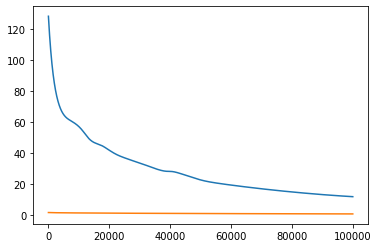

Writing model to prefix colon_retrain_62_100_200 with seeds (1,2)

-------------------------------------------
1.0
1.0039276505764518
(62, 150)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 3.00e-06
iteration 10000: loss 96.430071
iteration 20000: loss 67.912941
iteration 30000: loss 50.916195
iteration 40000: loss 40.745340
iteration 50000: loss 34.720497
iteration 60000: loss 31.194201
iteration 70000: loss 29.021592
iteration 80000: loss 26.186467
iteration 90000: loss 23.162980

Now fixing trained W1 and retraining W2, initialized at zero
iteration 10000: loss 1.247877
iteration 20000: loss 1.143880
iteration 30000: loss 1.056916
iteration 40000: loss 0.981314
iteration 50000: loss 0.914451
iteration 60000: loss 0.854640
iteration 70000: loss 0.800693
iteration 80000: loss 0.751719
iteration 90000: loss 0.707025


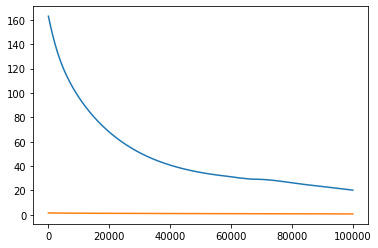

Writing model to prefix colon_retrain_62_150_300 with seeds (1,2)

-------------------------------------------
1.0
1.0060386011228442
(62, 250)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 10000: loss 241.202541
iteration 20000: loss 182.250584
iteration 30000: loss 136.007781
iteration 40000: loss 113.704922
iteration 50000: loss 99.325955
iteration 60000: loss 88.832299
iteration 70000: loss 81.792067
iteration 80000: loss 75.134833
iteration 90000: loss 70.150923

Now fixing trained W1 and retraining W2, initialized at zero
iteration 10000: loss 1.302992
iteration 20000: loss 1.223073
iteration 30000: loss 1.157931
iteration 40000: loss 1.099824
iteration 50000: loss 1.046769
iteration 60000: loss 0.997735
iteration 70000: loss 0.952056
iteration 80000: loss 0.909271
iteration 90000: loss 0.869043


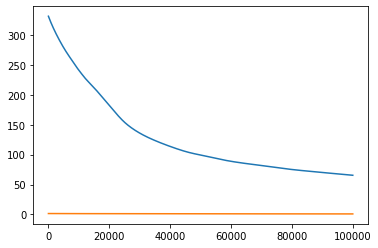

Writing model to prefix colon_retrain_62_250_500 with seeds (1,2)

-------------------------------------------
1.0
1.0050400871832559
(62, 500)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 10000: loss 177.156443
iteration 20000: loss 117.861243
iteration 30000: loss 115.027929
iteration 40000: loss 99.085779
iteration 50000: loss 78.038934
iteration 60000: loss 66.233725
iteration 70000: loss 58.047079
iteration 80000: loss 47.224888
iteration 90000: loss 39.107713

Now fixing trained W1 and retraining W2, initialized at zero
iteration 10000: loss 1.203381
iteration 20000: loss 1.061938
iteration 30000: loss 0.943876
iteration 40000: loss 0.842286
iteration 50000: loss 0.753649
iteration 60000: loss 0.675722
iteration 70000: loss 0.606890
iteration 80000: loss 0.545892
iteration 90000: loss 0.491698


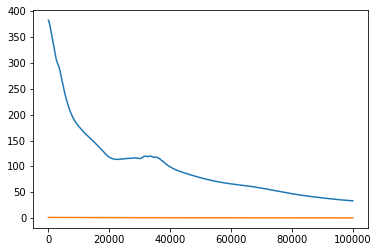

Writing model to prefix colon_retrain_62_500_1000 with seeds (1,2)

-------------------------------------------
1.0
1.005249299340254
(62, 1000)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-07
iteration 10000: loss 696.192053
iteration 20000: loss 586.602343
iteration 30000: loss 508.549351
iteration 40000: loss 451.898785
iteration 50000: loss 414.631522
iteration 60000: loss 385.939854
iteration 70000: loss 363.636887
iteration 80000: loss 343.379567
iteration 90000: loss 321.318154

Now fixing trained W1 and retraining W2, initialized at zero
iteration 10000: loss 1.374836
iteration 20000: loss 1.317031
iteration 30000: loss 1.273789
iteration 40000: loss 1.237137
iteration 50000: loss 1.203920
iteration 60000: loss 1.172836
iteration 70000: loss 1.143307
iteration 80000: loss 1.115043
iteration 90000: loss 1.087875


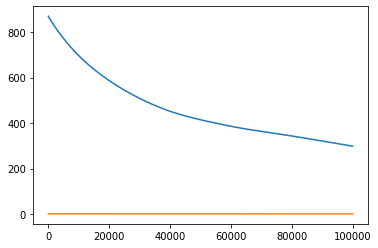

Writing model to prefix colon_retrain_62_1000_2000 with seeds (1,2)


In [7]:
# Analagous models trained with step size 100000

n = 62
d = np.array([100, 150, 250, 500, 1000])
p = np.array([j*2 for j in d])
steps = np.array([5e-6, 3e-6, 1e-6, 1e-6, 1e-7])
Y = pd.read_csv("colon_y.csv").to_numpy()
X = pd.read_csv("colon_x.csv").to_numpy()
for i in np.arange(0, len(p)): 
    print("\n-------------------------------------------")
    np.random.seed(1)
    X_ = X[:, np.random.choice(1999, size = d[i], replace = False)]
    X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
    print(np.std(X_))
    X_ = np.random.normal(X_, scale = 0.001)
    print(np.std(X_))
    print(X_.shape)
    print(Y.shape)
    (W1, W2) = train_model(Y, X_, d[i], p[i], steps=100000, step_size=steps[i], retrain=True)
    write_model('colon_retrain_%d_%d_%d' % (n, d[i], p[i]), 1, 2, X_, W1, W2)
    


-------------------------------------------
1.0
0.9999977818198226
(62, 100)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 5.00e-06
iteration 2000: loss 85.240761
iteration 4000: loss 68.217021
iteration 6000: loss 59.586615
iteration 8000: loss 54.349791
iteration 10000: loss 50.859764
iteration 12000: loss 47.871219
iteration 14000: loss 44.858952
iteration 16000: loss 42.073953
iteration 18000: loss 39.568642


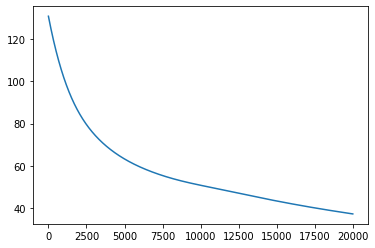

Writing model to prefix colon_62_100_200 with seeds (1,2)

-------------------------------------------
1.0
0.9999900231183423
(62, 150)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 3.00e-06
iteration 2000: loss 127.332217
iteration 4000: loss 114.604924
iteration 6000: loss 104.170270
iteration 8000: loss 95.653427
iteration 10000: loss 88.354405
iteration 12000: loss 81.730604
iteration 14000: loss 75.776813
iteration 16000: loss 70.414080
iteration 18000: loss 65.599294


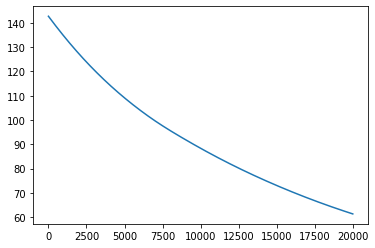

Writing model to prefix colon_62_150_300 with seeds (1,2)

-------------------------------------------
1.0
1.0000111017416626
(62, 250)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 2000: loss 307.891592
iteration 4000: loss 276.062080
iteration 6000: loss 250.857137
iteration 8000: loss 231.302955
iteration 10000: loss 216.208973
iteration 12000: loss 204.497132
iteration 14000: loss 194.151192
iteration 16000: loss 183.561669
iteration 18000: loss 173.554581


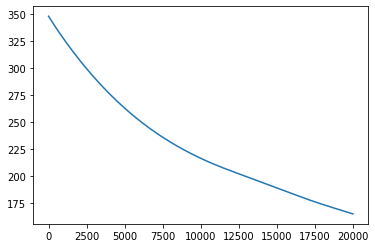

Writing model to prefix colon_62_250_500 with seeds (1,2)

-------------------------------------------
1.0
1.0000011420836974
(62, 500)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 1.00e-06
iteration 2000: loss 307.090554
iteration 4000: loss 272.221453
iteration 6000: loss 248.291750
iteration 8000: loss 200.670793
iteration 10000: loss 174.391019
iteration 12000: loss 157.446641
iteration 14000: loss 145.873123
iteration 16000: loss 137.374317
iteration 18000: loss 130.358265


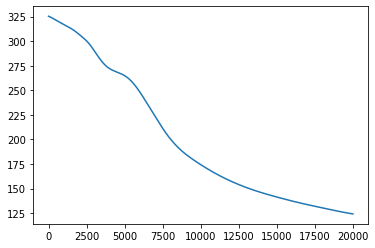

Writing model to prefix colon_62_500_1000 with seeds (1,2)

-------------------------------------------
1.0
1.0000029730677393
(62, 1000)
(62, 1)
Seeding random initial parameters; seeds = (1,2)
Running gradient descent with step size 6.00e-07
iteration 2000: loss 721.841461
iteration 4000: loss 608.778433
iteration 6000: loss 532.259075
iteration 8000: loss 471.406414
iteration 10000: loss 427.207351
iteration 12000: loss 390.695143
iteration 14000: loss 355.590006
iteration 16000: loss 322.813202
iteration 18000: loss 296.961089


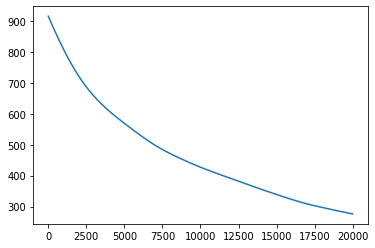

Writing model to prefix colon_62_1000_2000 with seeds (1,2)


In [6]:
# Models trained with step size 20000 without retraining

n = 62
d = np.array([100, 150, 250, 500, 1000])
p = np.array([j*2 for j in d])
lrs = np.array([5e-6, 3e-6, 1e-6, 1e-6, 6e-7])
Y = pd.read_csv("colon_y.csv").to_numpy()
X = pd.read_csv("colon_x.csv").to_numpy()
for i in np.arange(0, len(p)): 
    print("\n-------------------------------------------")
    np.random.seed(1)
    X_ = X[:, np.random.choice(1999, size = d[i], replace = False)]
    X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
    print(np.std(X_))
    X_ = np.random.normal(X_, scale = 0.001)
    print(np.std(X_))
    print(X_.shape)
    print(Y.shape)
    (W1, W2) = train_model(Y, X_, d[i], p[i], steps=20000, step_size=lrs[i], retrain=False)
    write_model('colon_%d_%d_%d' % (n, d[i], p[i]), 1, 2, X_, W1, W2)
    